In [40]:
#Dependencies
import math
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
#Load the data
df = pd.read_csv("data/ETH_day.csv", encoding = 'utf-8', delimiter=';')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,15/04/2020,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,14/04/2020,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,13/04/2020,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,12/04/2020,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,11/04/2020,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [42]:
# Delete Symbol column
del df["Symbol"]
df.head()

,Date,Open,High,Low,Close,Volume ETH,Volume USD
0,15/04/2020,158.61,158.61,158.61,158.61,0.00,0.00
1,14/04/2020,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,13/04/2020,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,12/04/2020,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,11/04/2020,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [43]:
# Parse column Date from String to Date
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Date,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [44]:
# Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Volume ETH,Volume USD
2020-04-15,2020-04-15,158.61,158.61,158.61,158.61,0.00,0.00
2020-04-14,2020-04-14,156.97,162.15,155.74,158.61,18061.58,2872210.44
2020-04-13,2020-04-13,158.56,159.51,150.12,156.97,15698.32,2416728.28
2020-04-12,2020-04-12,158.66,165.37,155.21,158.56,12877.33,2082804.05
2020-04-11,2020-04-11,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [45]:
future_days = 5

In [48]:
# Create a new column
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

# Show data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2020-04-15,158.61,158.26
2020-04-14,158.61,171.16
2020-04-13,156.97,173.48
2020-04-12,158.56,164.70
2020-04-11,158.66,171.49
...,...,...
2016-05-13,10.69,NaN
2016-05-12,10.20,NaN
2016-05-11,10.43,NaN
2016-05-10,9.68,NaN


In [49]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[158.61]
 [158.61]
 [156.97]
 ...
 [ 11.37]
 [ 10.06]
 [ 10.25]]


In [50]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[158.26 171.16 173.48 ...  10.43   9.68   9.98]


In [51]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [52]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [53]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9691910009330561


In [54]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 301.96386885  134.20051222  132.74023803   11.27972726  116.19733581
   12.48754656   11.20126085  235.95355402   11.99636555  199.45475065
  371.53888426   11.8125417   303.05138436  290.27866873  629.63793926
  208.0350933    41.75648226  130.99194063  291.56297795  235.7915382
  964.28558547  202.98291163  274.06501807  145.13458423  425.10433823
   46.86199477  276.42209907   42.33832602  218.93322462   11.26228703
  409.2179337   311.90363813  209.8154099    11.31461327  429.49957007
  283.11895842  221.69028097  194.75421024   11.65513944   10.90517187
  185.09115235  174.74414176    7.80377567  398.34804796  265.93339148
  289.80916685    7.36099989  297.76235101  163.12183447  325.50690673
   11.13154449  277.04259316   13.73053484  250.4831385   425.75344624
  261.19065769  448.67318782  375.89265346   11.54155273  124.53201584
   10.76602233  180.96864332   91.5743621   374.47673539  281.50338506
  147.22678647  532.99333657  274.78060105  740.37033619  683.17714329
  628.9

In [55]:
print(y_test)

[ 264.23  134.21  143.17   10.87  110.66   11.88   10.76  270.     12.33
  223.77  393.81   11.48  337.33  284.17  534.    196.95   45.38  130.31
  303.49  232.15 1024.11  209.99  270.76  150.66  485.87   50.39  245.9
   23.6   228.5    11.36  382.42  308.09  181.43   11.51  470.52  308.09
  174.    194.67   11.03   10.7   186.28  180.74    7.77  419.1   247.39
  286.25    8.64  305.57  174.03  248.37   10.76  287.22   14.16  249.95
  462.    256.03  464.    519.98   11.8   139.14   10.66  191.65   77.7
  331.4   297.8    87.91  605.79  363.25  747.29  683.5   618.13  112.05
  228.71   11.76  306.5   601.38  198.71  467.5   162.7  1274.09   12.53
  578.75  129.54   99.38   12.97   13.28  131.46 1060.    100.59   12.43
  259.07   12.96  170.     10.89   10.79  224.5    12.    720.23  178.47
  331.33  265.4   183.9   147.85  381.    339.     92.67  296.06  294.28
  255.06  261.04   35.    227.14  224.     87.    147.67  146.09   13.43
  201.44  486.22   48.29  266.17  389.19   13.75  221

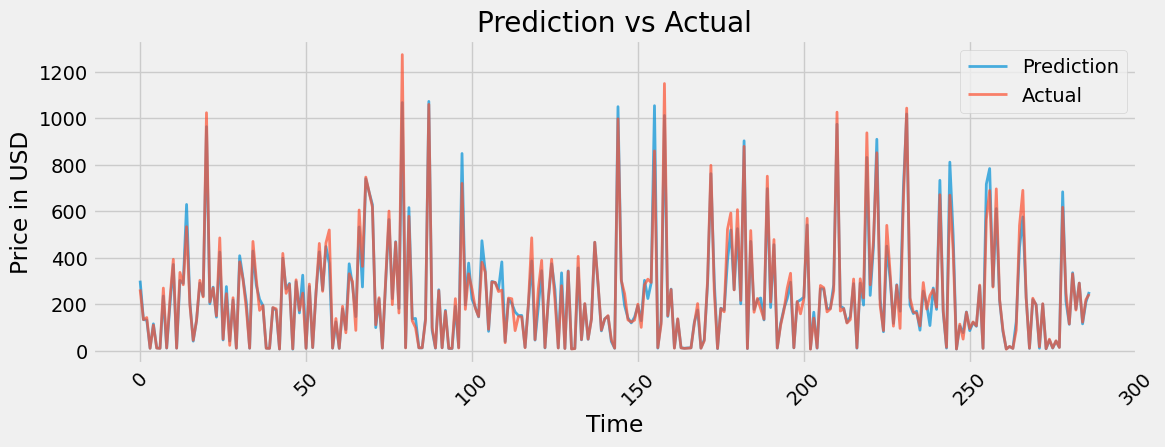

In [56]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()